<a href="https://colab.research.google.com/github/anquabkhan/Imdb_sentiment_analysis/blob/main/Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df_imdb = pd.read_csv("/content/IMDB+Dataset.csv",engine='python', error_bad_lines=False)

Skipping line 7090: unexpected end of data


In [4]:
df_imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
7083,Maybe I was to young when I saw it. Perhaps I ...,negative
7084,This is one seriously disturbed movie. Even Th...,negative
7085,It's the 1980's and the teenagers are ready to...,positive
7086,What a crazy film!It lasts 12(!) hours and you...,positive


In [5]:
df_imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df_imdb.tail(10)

,review,sentiment
7078,"At it's core, this is a fairly typical revenge...",negative
7079,I've seen the 1973 movie Lost Horizons and rea...,positive
7080,"You probably all already know this by now, but...",positive
7081,Nick and Kelly are ready to be married but Tra...,positive
7082,I saw this movie when it aired on Lifetime bac...,positive
7083,Maybe I was to young when I saw it. Perhaps I ...,negative
7084,This is one seriously disturbed movie. Even Th...,negative
7085,It's the 1980's and the teenagers are ready to...,positive
7086,What a crazy film!It lasts 12(!) hours and you...,positive
7087,What about Dahmer's childhood?- The double her...,negative


In [7]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     7088 non-null   object
 1   sentiment  7088 non-null   object
dtypes: object(2)
memory usage: 110.9+ KB


In [8]:
df_imdb['length'] = df_imdb['review'].apply(len)

In [9]:
df_imdb

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
7083,Maybe I was to young when I saw it. Perhaps I ...,negative,408
7084,This is one seriously disturbed movie. Even Th...,negative,726
7085,It's the 1980's and the teenagers are ready to...,positive,1722
7086,What a crazy film!It lasts 12(!) hours and you...,positive,340


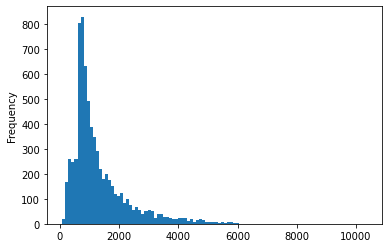

In [10]:
df_imdb['length'].plot(kind= 'hist', bins=100)

In [11]:
df_pos = df_imdb.query("length == 998 and sentiment	 == 'positive'	")

In [12]:
df_pos

,review,sentiment,length
1,A wonderful little production. <br /><br />The...,positive,998
6543,"I've read reviews of Kerching on IMDb, and fra...",positive,998


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



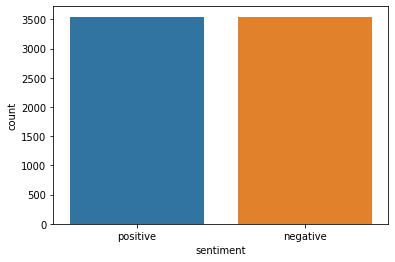

In [13]:
sns.countplot(df_imdb['sentiment'], label= 'count' )

In [14]:
df_imdb

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
7083,Maybe I was to young when I saw it. Perhaps I ...,negative,408
7084,This is one seriously disturbed movie. Even Th...,negative,726
7085,It's the 1980's and the teenagers are ready to...,positive,1722
7086,What a crazy film!It lasts 12(!) hours and you...,positive,340


In [15]:
X = pd.DataFrame(data= df_imdb, columns=['review'])
y = pd.DataFrame(data= df_imdb, columns=['sentiment'])

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def message_cleaning(message):
  msg_punc_rem = [ char for char in message if char not in string.punctuation]
  msg_punc_rem_string = ''.join(msg_punc_rem)
  msg_without_stop = [ word  for word in msg_punc_rem_string.split() if word not in stopwords.words('english') ]
  return msg_without_stop

# Vectorizer 


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer(analyzer= message_cleaning)

In [42]:
imdb_review_vectorizer = vectorizer.fit_transform(df_imdb['review'])

In [43]:
imdb_review_vectorizer.shape

(7088, 72151)

In [44]:
print(vectorizer.get_feature_names())

['0', '000', '00000110', '0069', '007', '007s', '00s', '01', '010', '0126', '02', '0310', '04', '05', '0510', '053105', '06', '07', '0815', '0br', '0clock', '0s', '1', '10', '100', '1000', '10000', '100000', '1000000', '10002000', '100B', '100Bt', '100br', '100if', '100minute', '100s', '100th', '100times', '101', '1010', '1010br', '1012', '1014', '1015', '101minute', '101st', '101year', '102', '1020', '1020000', '10282007', '103', '1030', '1035', '105', '105Apocalypsethese', '106', '107', '1072000', '108', '1080', '1095', '10DirBrad', '10DirEmmanuel', '10DirGeorge', '10DirJesus', '10DirJon', '10DirMick', '10This', '10br', '10dimensional', '10page', '10s', '10star', '10th', '10to1', '10well', '10what', '10which', '10x', '10yearold', '11', '110', '1100', '1100ad', '11072004', '110br', '110mph', '111', '1110', '1111', '112', '112902', '1130PM', '1133', '1138', '1150', '116', '1166', '116minute', '116th', '117', '11M', '11th', '11yearold', '12', '120', '1200', '12000000', '1201', '1201pm',

In [45]:
imdb_review_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Training the Model

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
NB_classifier = MultinomialNB()
label = df_imdb['sentiment'].values

In [49]:
NB_classifier.fit(imdb_review_vectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
testing_sample = ["I am sorry to say but the movie was very bad and boring !also the story was very poor and had many mistakes in the plot"]

In [51]:
testing_sample_count_vectorizer = vectorizer.transform(testing_sample)

In [52]:
test_predict = NB_classifier.predict(testing_sample_count_vectorizer)
test_predict

array(['negative'], dtype='<U8')

#Divide the data into training and testing

In [65]:
X = imdb_review_vectorizer
y = label

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [78]:
imdb_classifer = NB_classifier.fit(X_train, y_train)

In [79]:
y_predict_train = imdb_classifer.predict(X_train)

In [80]:
y_predict_train

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'positive'], dtype='<U8')

#Evaluating the model

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
cm = confusion_matrix(y_train, y_predict_train)

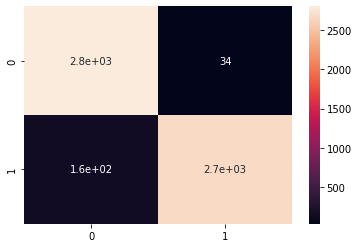

In [82]:
sns.heatmap(cm, annot= True)

In [83]:
y_predict_test = imdb_classifer.predict(X_test)

In [84]:
cm_test = confusion_matrix(y_test, y_predict_test)

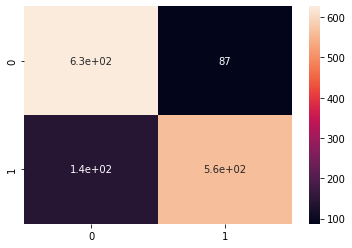

In [85]:
sns.heatmap(cm_test, annot=True)

In [87]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.82      0.88      0.85       714
    positive       0.87      0.80      0.83       704

    accuracy                           0.84      1418
   macro avg       0.84      0.84      0.84      1418
weighted avg       0.84      0.84      0.84      1418

